# Loading and preprocessing the Dataset

In [18]:
import pandas as pd  # Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('world_bank_dataset.csv')
print(df.head())
print(df.info())

  Country  Year     GDP (USD)   Population  Life Expectancy  \
0  Brazil  2010  1.493220e+12  829020000.0             66.7   
1   Japan  2011  1.756270e+13  897010000.0             61.4   
2   India  2012  1.642688e+13  669850000.0             69.1   
3  Mexico  2013  1.189001e+13  113800000.0             80.1   
4   India  2014  2.673020e+12   29710000.0             62.7   

   Unemployment Rate (%)  CO2 Emissions (metric tons per capita)  \
0                   3.81                                   10.79   
1                  17.98                                   15.67   
2                  16.02                                    2.08   
3                   6.26                                   19.13   
4                   3.10                                   15.66   

   Access to Electricity (%)  
0                      76.76  
1                      67.86  
2                      81.08  
3                      53.46  
4                      82.17  
<class 'pandas.core.frame.

In [19]:
print(df.shape)
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nNumber of duplicated rows:", df.duplicated().sum())

(200, 8)

Missing values per column:
Country                                   0
Year                                      0
GDP (USD)                                 0
Population                                0
Life Expectancy                           0
Unemployment Rate (%)                     0
CO2 Emissions (metric tons per capita)    0
Access to Electricity (%)                 0
dtype: int64

Number of duplicated rows: 0


In [20]:
df['Country'].value_counts()

Country
India             15
Saudi Arabia      13
Indonesia         13
United Kingdom    13
France            12
Argentina         12
Italy             12
United States     11
Japan             10
Mexico            10
Canada            10
Nigeria            9
Turkey             9
South Africa       8
China              8
Russia             8
Brazil             7
Germany            7
Australia          7
South Korea        6
Name: count, dtype: int64

# Data Cleaning

In [21]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df_clean = df.groupby(['Country', 'Year'], as_index=False).mean(numeric_only=True)

# Data Visualization¶

## 1. GDP by Country

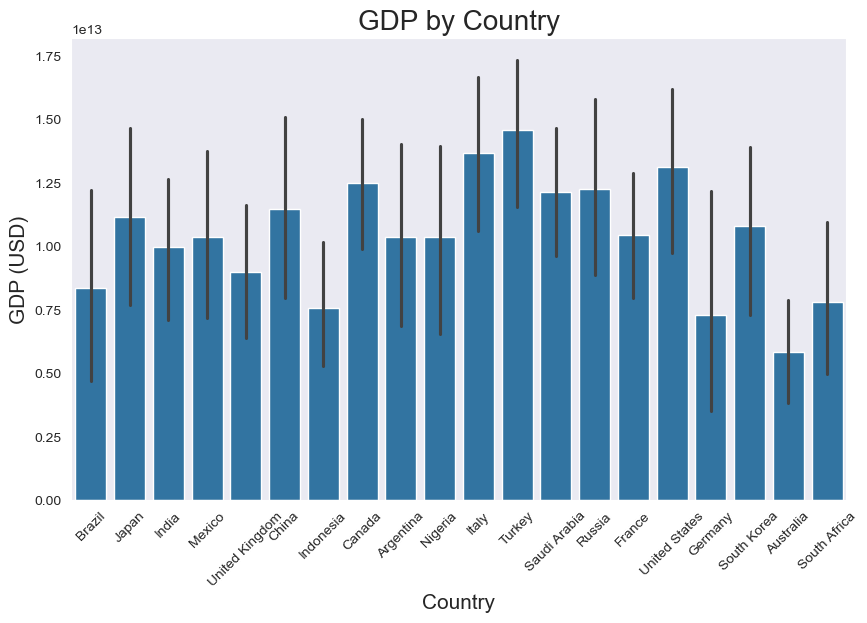

In [22]:
plt.figure(figsize = (10, 6))
sns.barplot(data = df, x = 'Country', y = 'GDP (USD)')
plt.title('GDP by Country', fontsize = 20)
plt.ylabel('GDP (USD)', fontsize = 15)
plt.xlabel('Country', fontsize = 15)
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()

## 2. GDP Over Time for Selected Countries

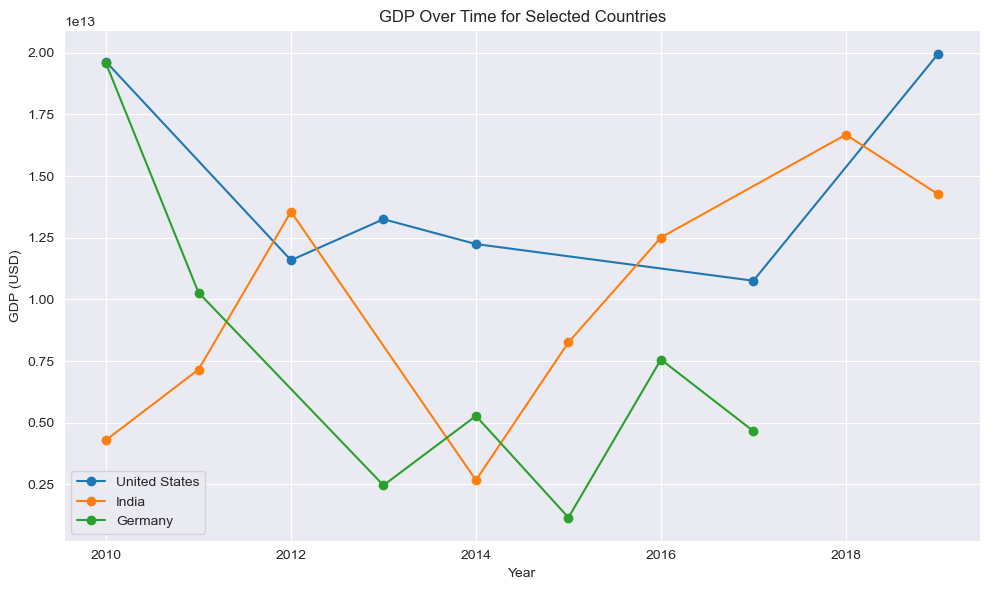

In [23]:
plt.figure(figsize=(10,6))
countries = ['United States', 'India', 'Germany']

for country in countries:
    subset = df_clean[df_clean['Country'] == country].sort_values(by='Year')
    plt.plot(subset['Year'], subset['GDP (USD)'], label=country, marker='o')

plt.title('GDP Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Correlation Heatmap of Numeric Features

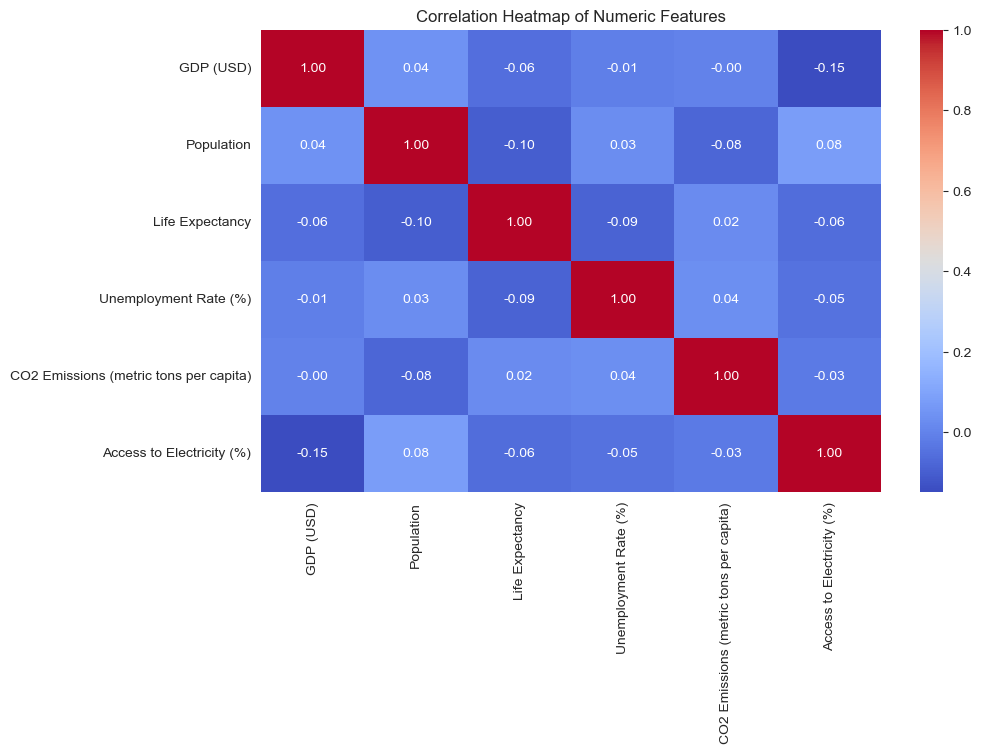

In [24]:
numeric_cols = ['GDP (USD)', 'Population', 'Life Expectancy',
                'Unemployment Rate (%)', 'CO2 Emissions (metric tons per capita)',
                'Access to Electricity (%)']
corr = df[numeric_cols].corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## 4. Distribution of CO2 Emissions per Country


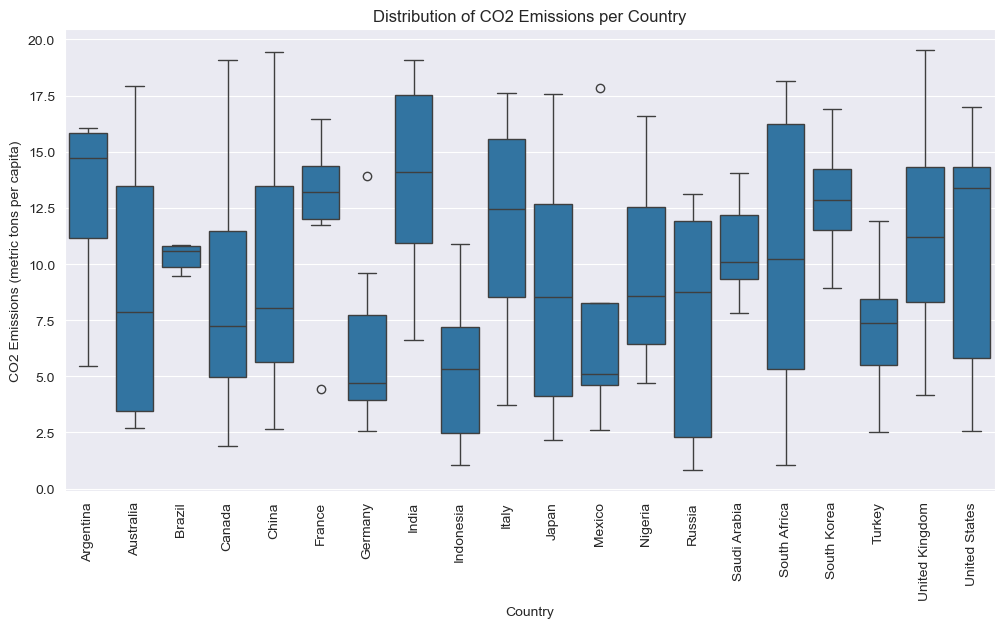

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='CO2 Emissions (metric tons per capita)', data=df_clean)
plt.xticks(rotation=90)
plt.title('Distribution of CO2 Emissions per Country')
plt.show()


## 5. Unemployment Rate (%)¶


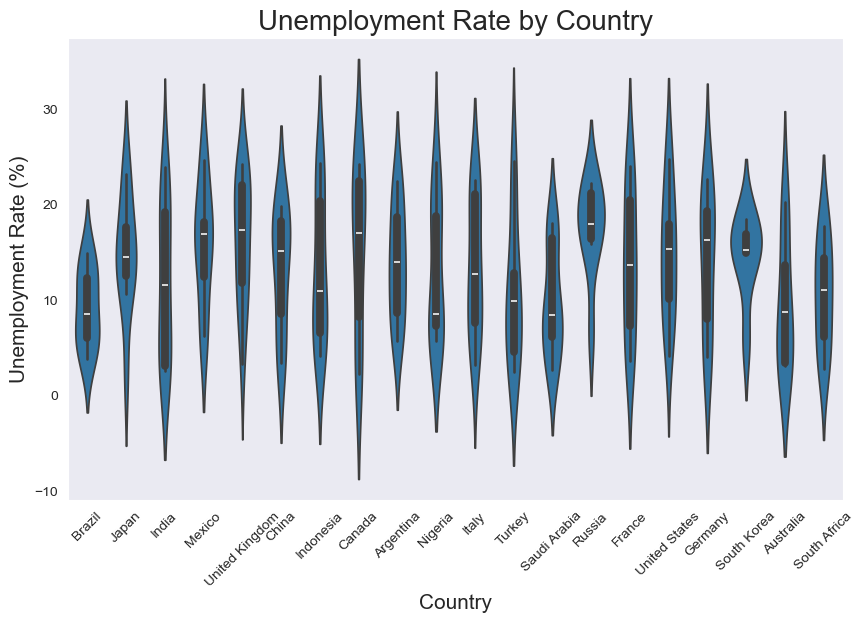

In [26]:
plt.figure(figsize = (10, 6))
sns.violinplot(data = df, x = 'Country', y = 'Unemployment Rate (%)' )
plt.title('Unemployment Rate by Country', fontsize = 20)
plt.ylabel('Unemployment Rate (%)', fontsize = 15)
plt.xlabel('Country', fontsize = 15)
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()

## 6. CO2 Emissions (metric tons per capita)


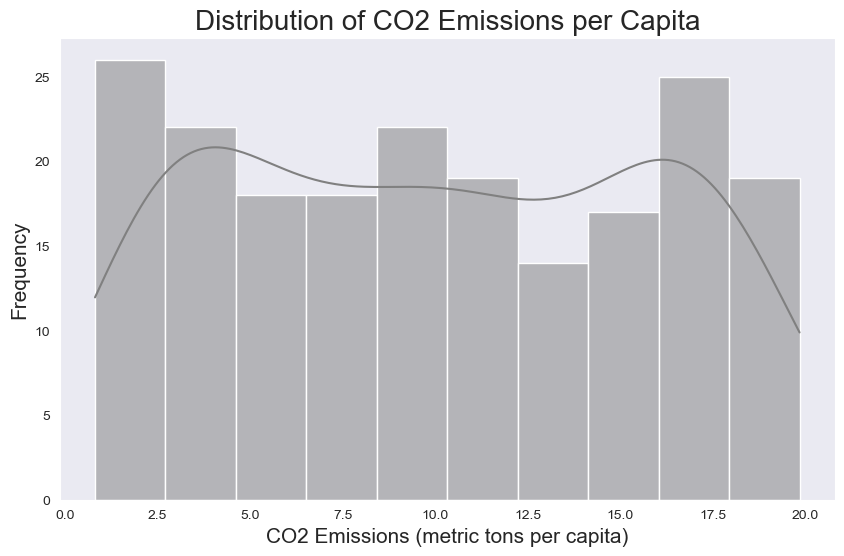

In [27]:
plt.figure(figsize = (10, 6))
sns.histplot(df['CO2 Emissions (metric tons per capita)'], bins = 10, kde = True, color = 'grey')
plt.title('Distribution of CO2 Emissions per Capita', fontsize = 20)
plt.xlabel('CO2 Emissions (metric tons per capita)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.grid()
plt.show()

## 7. Mean Life Expectancy by Country


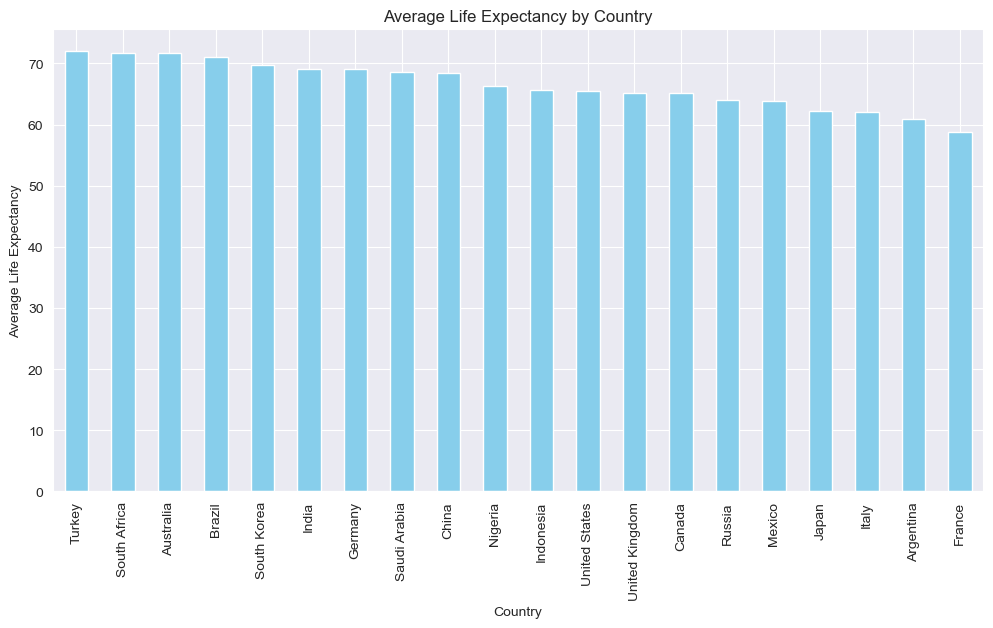

In [28]:
life_exp = df_clean.groupby('Country')['Life Expectancy'].mean().sort_values(ascending=False)
life_exp.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Country')
plt.xticks(rotation=90)
plt.show()


## 8. Scatterplot: GDP vs CO2


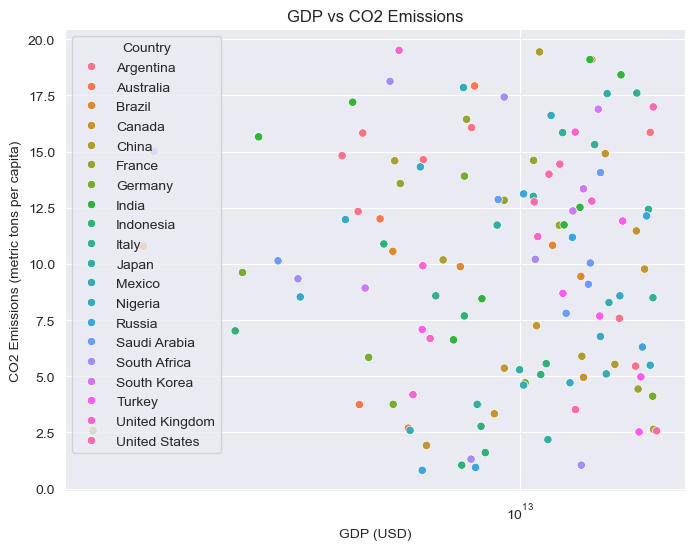

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='GDP (USD)', y='CO2 Emissions (metric tons per capita)', hue='Country')
plt.xscale('log')  # GDP can vary widely, so log scale helps visualize
plt.title('GDP vs CO2 Emissions')
plt.show()


## 9. Life Expectancy Over Time for Selected Countries


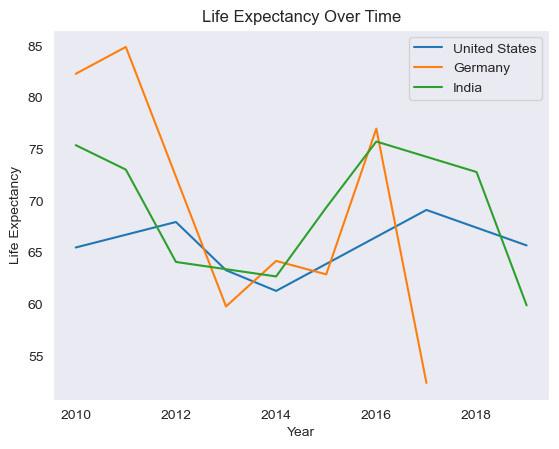

In [30]:
countries = ['United States', 'Germany', 'India']
for country in countries:
    subset = df_clean[df_clean['Country'] == country]
    plt.plot(subset['Year'], subset['Life Expectancy'], label=country)

plt.title('Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid()
plt.show()

## 10. Simple Linear Regression Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = ['GDP (USD)', 'Population', 'Access to Electricity (%)']
target = 'CO2 Emissions (metric tons per capita)'

X = df_clean[features]
y = df_clean[target]

# separating the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R^2 Score: -0.07657979358254452
MSE: 25.102340690996247


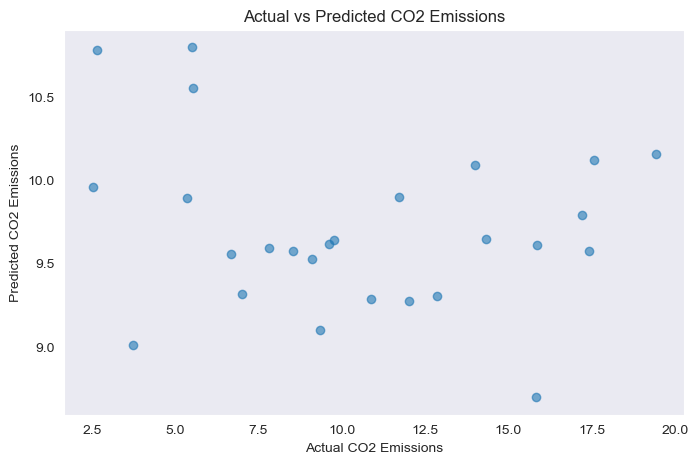

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.grid()
plt.show()